# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [82]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import requests
import time
import pytemperature
from pprint import pprint

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [83]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


# ######################################################################
# #FOR TESTING ONLY:
# cities = cities[0:10] 

601

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [84]:
#1: define the basics:
base_url = 'http://api.openweathermap.org/data/2.5/weather?'
query_url = f"{base_url}appid={api_key}&q="


print('Beginning Data Retrieval')
# records_json = []
city_list = []
cloudiness_list = []
country_list = []
unfmt_date_list = []
humidity_list = []
lat_list = []
lng_list = []
max_t_list = []
windspeed_list = []


#2: loop through each city and get their data:
rec_no = 1
for city in cities:
    try: 
        response = requests.get(query_url + city).json()
#         records_json.append(response)
        city_list.append(response['name'])
        cloudiness_list.append(response['clouds']['all'])
        country_list.append(response['sys']['country'])
        unfmt_date_list.append(response['dt']) 
        humidity_list.append(response['main']['humidity'])
        lat_list.append(response['coord']['lat'])
        lng_list.append(response['coord']['lon'])
        max_t_list.append(response['main']['temp_max'])
        windspeed_list.append(response['wind']['speed'])

        print(f"Processing Record {rec_no} of {len(cities)} | {city}")
    except:
        print(f"City ({city}) not found. Skipping to the next city")
    
    rec_no += 1


Beginning Data Retrieval
Processing Record 1 of 601 | port keats
Processing Record 2 of 601 | gizo
Processing Record 3 of 601 | cedar city
Processing Record 4 of 601 | severo-kurilsk
Processing Record 5 of 601 | cocorit
Processing Record 6 of 601 | tasiilaq
Processing Record 7 of 601 | san patricio
Processing Record 8 of 601 | ostrovnoy
City (satitoa) not found. Skipping to the next city
City (barentsburg) not found. Skipping to the next city
Processing Record 11 of 601 | hithadhoo
Processing Record 12 of 601 | albany
Processing Record 13 of 601 | necochea
Processing Record 14 of 601 | faya
Processing Record 15 of 601 | kenai
Processing Record 16 of 601 | ancud
Processing Record 17 of 601 | atuona
Processing Record 18 of 601 | saint-philippe
Processing Record 19 of 601 | kahului
Processing Record 20 of 601 | georgetown
Processing Record 21 of 601 | upernavik
Processing Record 22 of 601 | puerto escondido
Processing Record 23 of 601 | gombong
Processing Record 24 of 601 | manado
Process

Processing Record 201 of 601 | chulman
City (kapoeta) not found. Skipping to the next city
Processing Record 203 of 601 | coahuayana
Processing Record 204 of 601 | santa rosa
Processing Record 205 of 601 | cap malheureux
Processing Record 206 of 601 | salamanca
Processing Record 207 of 601 | carnarvon
Processing Record 208 of 601 | east london
Processing Record 209 of 601 | roald
Processing Record 210 of 601 | tuktoyaktuk
Processing Record 211 of 601 | vestmannaeyjar
Processing Record 212 of 601 | volchansk
Processing Record 213 of 601 | saskylakh
Processing Record 214 of 601 | kruisfontein
Processing Record 215 of 601 | qom
Processing Record 216 of 601 | verkhnevilyuysk
Processing Record 217 of 601 | mahina
City (amderma) not found. Skipping to the next city
Processing Record 219 of 601 | dingle
Processing Record 220 of 601 | dryden
City (bengkulu) not found. Skipping to the next city
City (falealupo) not found. Skipping to the next city
Processing Record 223 of 601 | rosarito
Process

Processing Record 398 of 601 | kolomna
Processing Record 399 of 601 | ashland
Processing Record 400 of 601 | santa cruz
Processing Record 401 of 601 | gondar
Processing Record 402 of 601 | matara
Processing Record 403 of 601 | zima
Processing Record 404 of 601 | jertih
Processing Record 405 of 601 | novaya zaimka
Processing Record 406 of 601 | solwezi
Processing Record 407 of 601 | jamsa
Processing Record 408 of 601 | nantucket
Processing Record 409 of 601 | deputatskiy
Processing Record 410 of 601 | hervey bay
Processing Record 411 of 601 | sorland
Processing Record 412 of 601 | takoradi
City (palabuhanratu) not found. Skipping to the next city
Processing Record 414 of 601 | indramayu
Processing Record 415 of 601 | impfondo
Processing Record 416 of 601 | flinders
Processing Record 417 of 601 | sterling
Processing Record 418 of 601 | stettler
Processing Record 419 of 601 | mendi
Processing Record 420 of 601 | bilma
City (akyab) not found. Skipping to the next city
Processing Record 422

Processing Record 598 of 601 | okmulgee
City (tawkar) not found. Skipping to the next city
Processing Record 600 of 601 | camacupa
City (waling) not found. Skipping to the next city


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [86]:
# CLEAN THE DATA!
# format the date:
fmt_date_list = pd.to_datetime(unfmt_date_list, unit = 's')
fmt_date_list

# format the max temp from kelvin to fahrenheit:
fmt_max_t_list = []
for x in max_t_list:
    fmt_max_t_list.append(pytemperature.k2f(x))
fmt_max_t_list



# Create a dictionary:
weather_dict = {
    'City': city_list,
    'Cloudiness': cloudiness_list,
    'Country': country_list,
    'Date': fmt_date_list,
    'Humidity': humidity_list,
    'Lat': lat_list,
    'Lng': lng_list,
    'Max Temp': fmt_max_t_list,
    'Wind Speed': windspeed_list
}


# Create Data Frame:
weather_df = pd.DataFrame(weather_dict)

# Export to csv:
weather_df.to_csv(output_data_file, header = True, mode = 'w', index = False)

# display the data frame:
weather_df.head()
   
    

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Port Keats,43,AU,2019-07-01 04:10:18,44,-14.25,129.55,85.49,5.04
1,Gizo,20,IL,2019-07-01 04:10:20,78,31.80,34.94,76.98,1.50
2,Cedar City,1,US,2019-07-01 04:09:19,42,37.68,-113.06,66.18,2.10
3,Severo-Kurilsk,0,RU,2019-07-01 04:10:22,93,50.68,156.12,44.07,7.07
4,Cocorit,20,MX,2019-07-01 04:10:23,51,27.57,-109.96,85.98,4.10


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

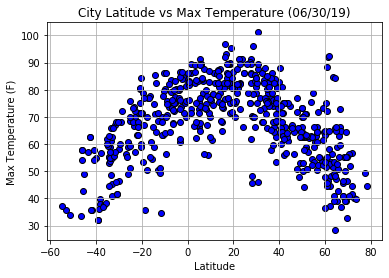

In [87]:
plt.scatter(weather_df['Lat'], weather_df['Max Temp'], marker = 'o', color = 'blue', edgecolor = 'black')

plt.title(f"City Latitude vs Max Temperature ({time.strftime('%m') + '/' + time.strftime('%d') + '/' + time.strftime('%y')})")
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid()
plt.savefig('Latitude_vs_MaxTemp.png')

#### Latitude vs. Humidity Plot

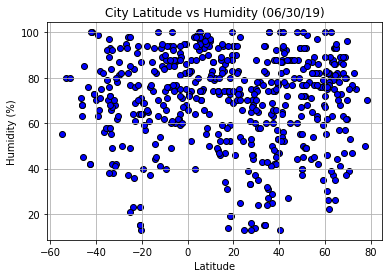

In [88]:
plt.scatter(weather_df['Lat'], weather_df['Humidity'], marker = 'o', color = 'blue', edgecolor = 'black')

plt.title(f"City Latitude vs Humidity ({time.strftime('%m') + '/' + time.strftime('%d') + '/' + time.strftime('%y')})")
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid()
plt.savefig('Latitude_vs_Humidity.png')

#### Latitude vs. Cloudiness Plot

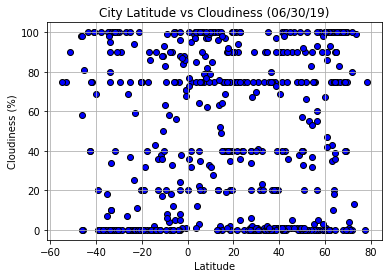

In [89]:
plt.scatter(weather_df['Lat'], weather_df['Cloudiness'], marker = 'o', color = 'blue', edgecolor = 'black')

plt.title(f"City Latitude vs Cloudiness ({time.strftime('%m') + '/' + time.strftime('%d') + '/' + time.strftime('%y')})")
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid()
plt.savefig('Latitude_vs_Cloudiness.png')

#### Latitude vs. Wind Speed Plot

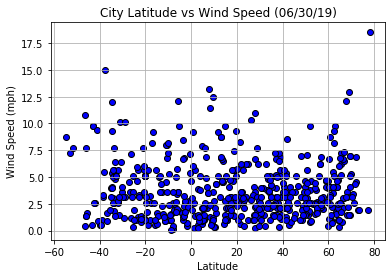

In [90]:
plt.scatter(weather_df['Lat'], weather_df['Wind Speed'], marker = 'o', color = 'blue', edgecolor = 'black')

plt.title(f"City Latitude vs Wind Speed ({time.strftime('%m') + '/' + time.strftime('%d') + '/' + time.strftime('%y')})")
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid()
plt.savefig('Latitude_vs_WindSpeed.png')